In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab Notebooks/' #change dir to your project folder

os.chdir('/content/' + root_path)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

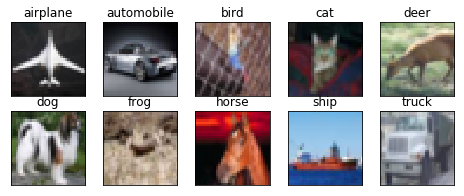

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
train_labels_integer = train_labels

test_labels_integer = test_labels

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels_integer[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
    
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import SeparableConv2D,GlobalAveragePooling2D,MaxPooling2D, Dropout, Conv2D, Input
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Lambda
from tensorflow import space_to_depth

from keras.layers import Concatenate
import tensorflow as tf



W0624 06:27:56.942963 140126479988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 06:27:56.958878 140126479988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(16, kernel_size=3, activation="relu", padding="same")`
W0624 06:27:56.962959 140126479988608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: U

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 32, 32, 16)   91          input_1[0][0]                    
__________________________________________________________________________________________________
separable_conv2d_2 (SeparableCo (None, 32, 32, 32)   688         separable_conv2d_1[0][0]         
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         separable_conv2d_2[0][0]         
__________________________________________________________________________________________________
conv2d_1 (

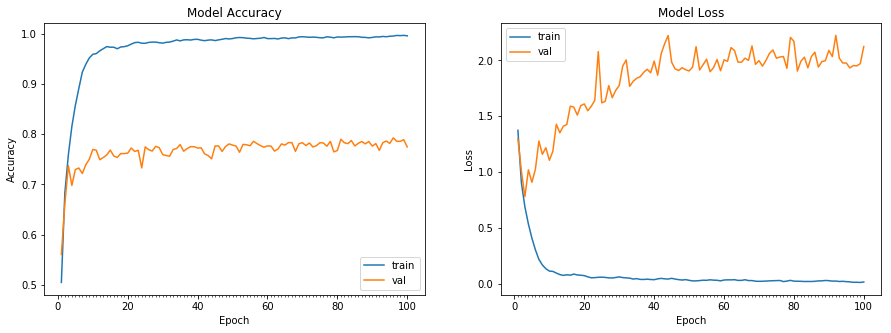

Accuracy on test data is: 79.25


In [8]:
def conv_block(x, num_blocks, block_num):
  
  for i in range(num_blocks):
    
    x= Conv2D(16 *(i+1) * block_num, kernel_size = 3,activation="relu" ,border_mode='same') (x)
    
  x = BatchNormalization() (x)
  
  x = Dropout(0.3) (x)
  #x = Activation("relu") (x)
  
  return x

def separable_conv_block(x, num_blocks, block_num):
  
  for i in range(num_blocks):
    
    x= SeparableConv2D(16 *(i+1) * block_num, kernel_size = 3,activation="relu" ,border_mode='same') (x)
    
  x = BatchNormalization() (x)
  
  
  
  
  return x

def transition_block(x, block_num):
  
  x = MaxPooling2D(pool_size=(2, 2))(x)
  
  x = Convolution2D(16 * block_num, 1, 1, border_mode='same') (x)
  
  return x


def space_to_depth_keras(x,block_size=2):
  return tf.space_to_depth(x, block_size=2)


lambda_layer = Lambda(space_to_depth_keras)

def space_to_depth_keras_2(x):
  return tf.space_to_depth(x, block_size=4)


lambda_layer2 = Lambda(space_to_depth_keras_2)



############ Architecture ####################

inputs = Input(shape=(32,32,3))

block_1 = separable_conv_block(inputs, 2, 1) #32

block_2 = conv_block(block_1, 2, 2) # 32

block_3 = conv_block(block_2, 2, 3) # 32

skip_1 = Concatenate(name="skip1")([block_1, block_3]) #32

block_4 = separable_conv_block(skip_1, 2, 4) #32

skip_2 = Concatenate(name= "skip2")([block_1, block_4])

block_5 = transition_block(skip_2, 1) #16


block_6 = separable_conv_block(block_5, 1, 2) #16

skip3 = Concatenate(name="skip3")([lambda_layer(block_4), lambda_layer(block_1), block_6])

block7 = conv_block(skip3, 2, 3)#16

skip4 = Concatenate(name="skip4")([lambda_layer(block_3), lambda_layer(block_4), block_6, block7])

block8 = separable_conv_block(skip4, 1, 4)#16

#67814

skip5 = Concatenate(name="skip5")([block_6, block7,block8, lambda_layer(block_1), lambda_layer(block_4)])


block9 = separable_conv_block(skip5, 2, 5)
#98614

skip6 = Concatenate(name="skip6")([block9, block8, block_6, lambda_layer(block_1), lambda_layer(block_4)])

block10 = transition_block(skip6, 2)# 8

skip7 = Concatenate(name="skip7")([block10, lambda_layer(block7)])

block11 = conv_block(skip7, 2, 3)

#11 8 2 1

skip8 = Concatenate(name="skip8")([block11, lambda_layer(block8), lambda_layer2(block_2), lambda_layer2(block_1)])

block12 = separable_conv_block(skip8, 2, 4)


#12 11 3 2 6
skip9 = Concatenate(name="skip9")([block12, block11, lambda_layer2(block_3), lambda_layer2(block_2), lambda_layer(block_6)])

block13 = conv_block(skip9, 1, 5)

#13 14 1 6 4 3 8

skip10 = Concatenate(name="skip10")([block13, block12, lambda_layer2(block_1), lambda_layer2(block_4), lambda_layer2(block_3) ,lambda_layer(block_6), lambda_layer(block8)])




block14 = separable_conv_block(skip10, 2, 6)

output_block = Conv2D(10, kernel_size=8)(block14)

output_flatten = Flatten()(output_block)


model_outputs = Activation("softmax")(output_flatten)


model = Model(inputs=inputs, outputs=model_outputs )

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

filepath = "assignment_7b_eva.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 460),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_7b_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))







